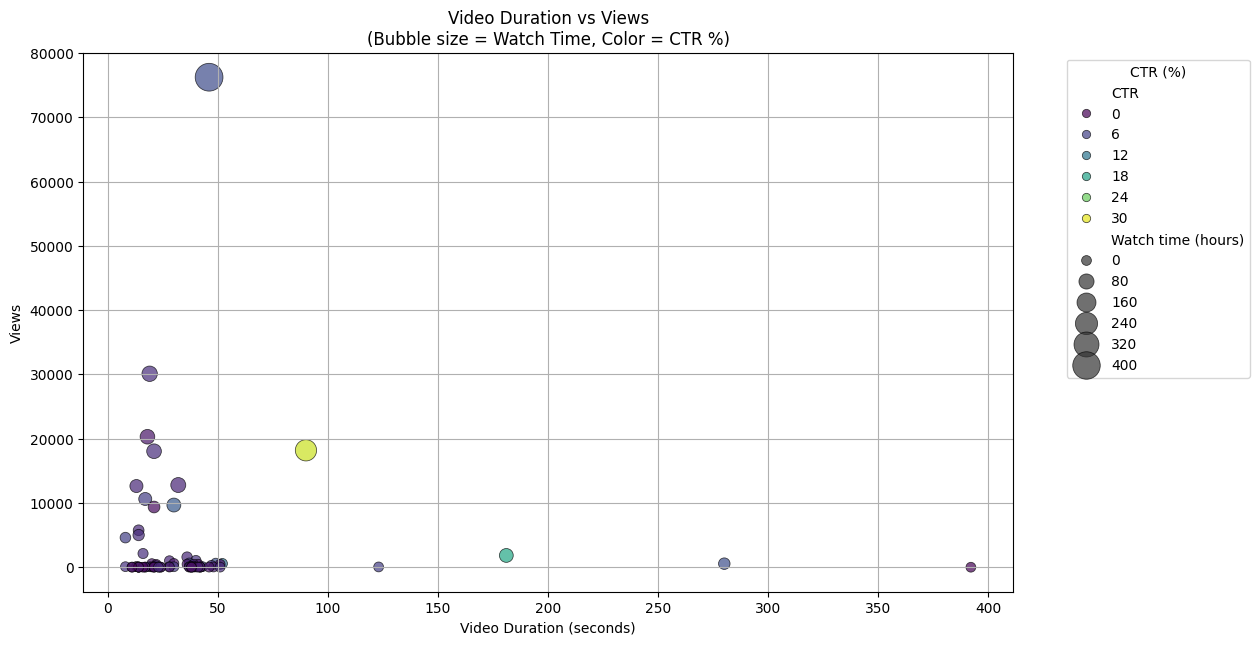

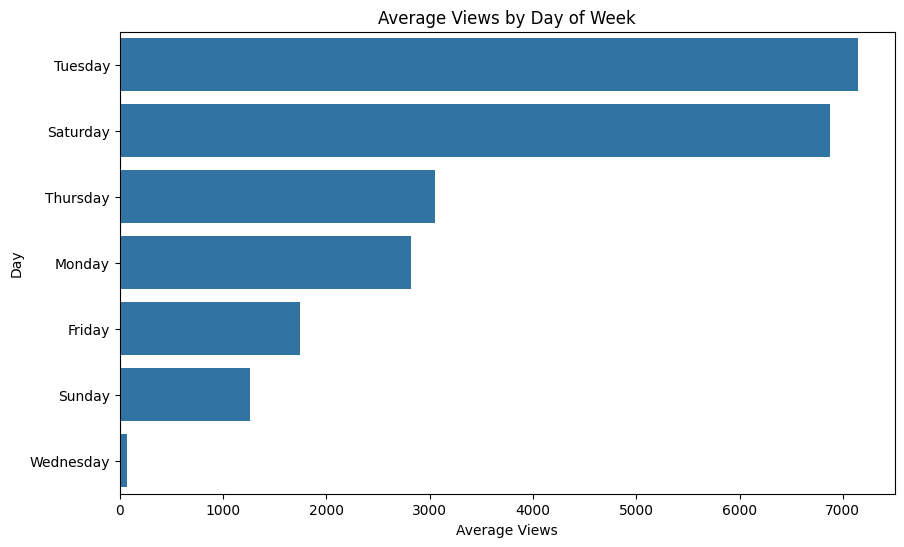

🔥 Top 5 Performing Videos 🔥


,Video title,Views,Watch time (hours),CTR
1,Jennie at ruby experience#jennie #kpop #ruby #jisoo #lisa #rose #zen#likejennie #trending #blackpink,"76,266",409.1,7.1%
2,Lisa talking about lily #jennie #lisa #blackpinkmembers #trending #dream #jisoo#rose #kpop#blackpink,"30,112",85.7,4.0%
3,I'm obsessed with this part #likejennie #jennie #kpop #jisoo #lisa #rose #trending #live #concert,"20,308",71.8,1.6%
4,Demon Slayer: Kimetsu no Yaiba Infinity Castle | FINAL TRAILER,"18,196",215.5,28.7%
5,Like Jennie live choreo #kpop #concert #jennie #likejennie #foryou #trending #jenniekim #jisoo #lisa,"18,053",72.3,4.0%


### 📌 Content Strategy Tips
- 🟢 Your viewers love short videos. Focus more on YouTube Shorts (<60 seconds).
- 📅 Best posting day for maximum views: **Tuesday**. Plan your uploads accordingly.
- 🎯 Medium-length videos (1–5 min) perform best. Try keeping content concise.
- ⚠️ CTR is lower on long videos. Improve thumbnails or hooks for longer content.
- ⏱️ Viewers aren’t watching much per video. Try making intros more engaging.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Step 2: Load your CSV files (make sure these files are in the same folder as your notebook)
chart_data = pd.read_csv("Chart data.csv")
table_data = pd.read_csv("Table data.csv")
totals_data = pd.read_csv("Totals.csv")

# Step 3: Clean and prepare data
# Remove total row if present
table_data = table_data[table_data["Content"] != "Total"]

# Convert relevant columns to numeric types
table_data["Views"] = pd.to_numeric(table_data["Views"], errors="coerce")
table_data["Duration"] = pd.to_numeric(table_data["Duration"], errors="coerce")
table_data["CTR"] = pd.to_numeric(table_data["Impressions click-through rate (%)"], errors="coerce")
table_data["Watch time (hours)"] = pd.to_numeric(table_data["Watch time (hours)"], errors="coerce")

# Parse video publish time and extract day of week
table_data["Video publish time"] = pd.to_datetime(table_data["Video publish time"], errors='coerce')
table_data["Day of Week"] = table_data["Video publish time"].dt.day_name()

# Step 4: Plot bubble chart Duration vs Views with CTR and Watch time info
plt.figure(figsize=(12,7))
sns.scatterplot(
    data=table_data,
    x="Duration",
    y="Views",
    hue="CTR",
    palette="viridis",
    size="Watch time (hours)",
    sizes=(50, 400),
    alpha=0.7,
    edgecolor="black"
)
plt.title("Video Duration vs Views\n(Bubble size = Watch Time, Color = CTR %)")
plt.xlabel("Video Duration (seconds)")
plt.ylabel("Views")
plt.grid(True)
plt.legend(title="CTR (%)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Step 5: Bar chart of average views by day of week
best_day = table_data.groupby("Day of Week")["Views"].mean().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]).sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=best_day, x="Views", y="Day of Week")
plt.title("Average Views by Day of Week")
plt.xlabel("Average Views")
plt.ylabel("Day")
plt.show()

# Step 6: Display top 5 videos table styled with color gradients
top_videos = table_data.sort_values(by="Views", ascending=False).head(5)
top_videos_display = top_videos[["Video title", "Views", "Watch time (hours)", "CTR"]]

print("🔥 Top 5 Performing Videos 🔥")
display(top_videos_display.style
        .background_gradient(cmap='YlGn')
        .format({"Views": "{:,.0f}", "Watch time (hours)": "{:.1f}", "CTR": "{:.1f}%"}))

# Step 7: Generate and display clear content strategy tips with emojis
tips = []

# Tip 1: Short videos success
if table_data["Duration"].mean() < 60:
    tips.append("🟢 Your viewers love short videos. Focus more on YouTube Shorts (<60 seconds).")

# Tip 2: High CTR
if table_data["CTR"].mean() > 5:
    tips.append("🖼️ Your thumbnails and titles are effective (CTR > 5%). Keep using similar styles!")

# Tip 3: Best posting day
top_post_day = best_day.iloc[0]["Day of Week"]
tips.append(f"📅 Best posting day for maximum views: **{top_post_day}**. Plan your uploads accordingly.")

# Tip 4: Ideal video length range
short = table_data[table_data["Duration"] <= 60]["Views"].mean()
medium = table_data[(table_data["Duration"] > 60) & (table_data["Duration"] <= 300)]["Views"].mean()
long = table_data[table_data["Duration"] > 300]["Views"].mean()

max_views = max(short, medium, long)
if max_views == short:
    tips.append("📹 Short videos (<= 60 sec) are getting the most views. Consider making more Shorts.")
elif max_views == medium:
    tips.append("🎯 Medium-length videos (1–5 min) perform best. Try keeping content concise.")
else:
    tips.append("📽️ Long-form videos (> 5 min) are working well. Great for in-depth content.")

# Tip 5: CTR drops on longer videos?
long_videos = table_data[table_data["Duration"] > 300]
if not long_videos.empty and long_videos["CTR"].mean() < table_data["CTR"].mean():
    tips.append("⚠️ CTR is lower on long videos. Improve thumbnails or hooks for longer content.")

# Tip 6: Watch time per view insight
table_data["Watch Time per View"] = table_data["Watch time (hours)"] * 60 / table_data["Views"]
average_watch_per_view = table_data["Watch Time per View"].mean()

if average_watch_per_view < 20:
    tips.append("⏱️ Viewers aren’t watching much per video. Try making intros more engaging.")
else:
    tips.append("👍 Your average watch time per view is strong. Keep making engaging content!")

# Show the tips
display(Markdown("### 📌 Content Strategy Tips\n" + "\n".join([f"- {tip}" for tip in tips])))


C:\Users\shara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


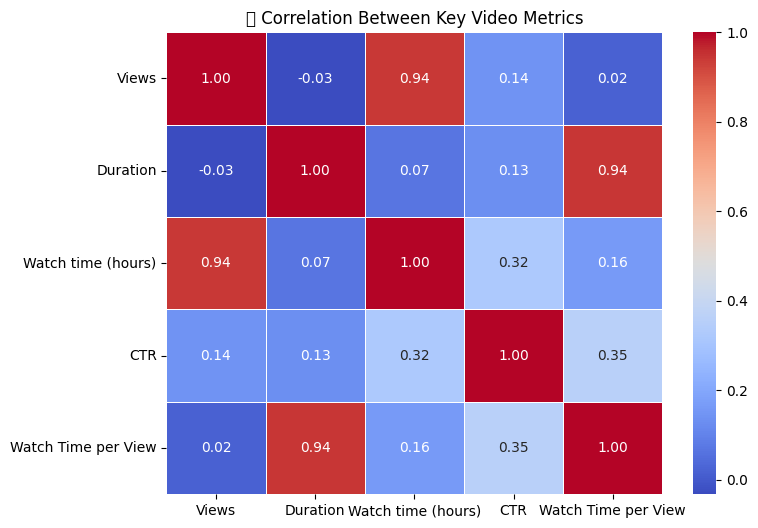

In [4]:
# 📊 Correlation Heatmap for numeric metrics
# We use only numeric columns and ensure Watch Time per View exists
if "Watch Time per View" not in table_data.columns:
    table_data["Watch Time per View"] = table_data["Watch time (hours)"] * 60 / table_data["Views"]

numeric_cols = ["Views", "Duration", "Watch time (hours)", "CTR", "Watch Time per View"]
corr_data = table_data[numeric_cols]

plt.figure(figsize=(8,6))
sns.heatmap(corr_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("🔗 Correlation Between Key Video Metrics")
plt.show()


In [5]:
# 🚀 Top 5 Videos by CTR
top_ctr = table_data.sort_values(by="CTR", ascending=False).head(5)
top_ctr_display = top_ctr[["Video title", "CTR", "Views", "Watch time (hours)"]]

print("🚀 Top 5 Videos by Click-Through Rate (CTR)")
display(top_ctr_display.style
        .background_gradient(cmap='BuGn')
        .format({
            "CTR": "{:.1f}%",
            "Views": "{:,.0f}",
            "Watch time (hours)": "{:.1f}"
        }))


🚀 Top 5 Videos by Click-Through Rate (CTR)


,Video title,CTR,Views,Watch time (hours)
53,LISA IN BLONDE HAIR 😍 #whenimwithyou #lalisa #tyla #trending #kpop #blackpink #fyp #lisa #tiktok,31.2%,23,0.0
4,Demon Slayer: Kimetsu no Yaiba Infinity Castle | FINAL TRAILER,28.7%,"18,196",215.5
15,Jennie - Like Jennie | Coachella Weekend 1 2025,18.6%,"1,834",58.0
37,Positions - Ariana Grande | Yor Forger | Spy x family [Edit/AMV],12.4%,78,0.6
22,Habibi | Loid forger | AMV edit | Spy x family,10.9%,566,5.6


C:\Users\shara\AppData\Local\Temp\ipykernel_22160\601966238.py:22: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\shara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


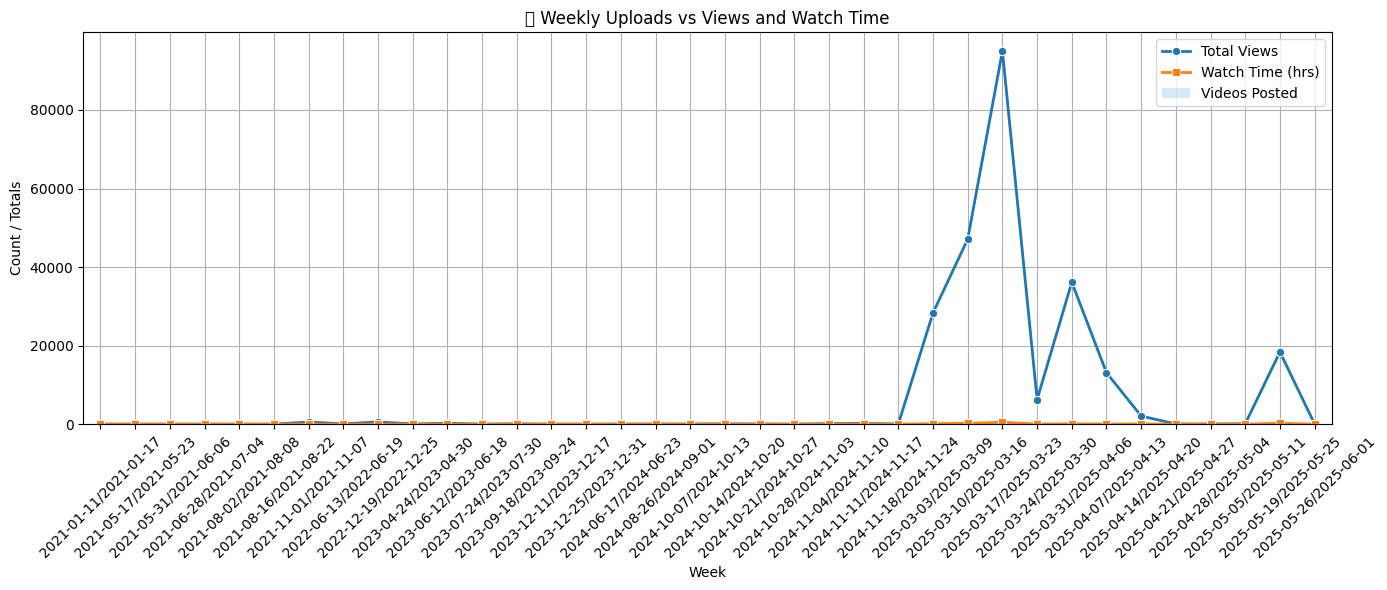

In [6]:
# 📅 Weekly Upload Frequency vs Views and Watch Time
table_data["Week"] = table_data["Video publish time"].dt.to_period("W").astype(str)

weekly_stats = table_data.groupby("Week").agg({
    "Video title": "count",
    "Views": "sum",
    "Watch time (hours)": "sum"
}).rename(columns={"Video title": "Videos Posted"}).reset_index()

# Plotting
plt.figure(figsize=(14,6))
sns.lineplot(data=weekly_stats, x="Week", y="Views", marker="o", label="Total Views", linewidth=2)
sns.lineplot(data=weekly_stats, x="Week", y="Watch time (hours)", marker="s", label="Watch Time (hrs)", linewidth=2)
sns.barplot(data=weekly_stats, x="Week", y="Videos Posted", color="skyblue", alpha=0.4, label="Videos Posted")

plt.title("📅 Weekly Uploads vs Views and Watch Time")
plt.xlabel("Week")
plt.ylabel("Count / Totals")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
